In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('AllCities.csv')

In [3]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [4]:
df.drop('seller_type', axis=1,inplace=True)

In [5]:
df.head()

,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [6]:
X = df[['bedroom', 'layout_type', 'property_type', 'locality', 'area', 'furnish_type', 'bathroom', 'city']]

In [7]:
X.head()

,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom,city
0,2.0,BHK,Apartment,Bodakdev,1450.0,Furnished,2.0,Ahmedabad
1,1.0,RK,Studio Apartment,CG Road,210.0,Semi-Furnished,1.0,Ahmedabad
2,3.0,BHK,Apartment,Jodhpur,1900.0,Unfurnished,3.0,Ahmedabad
3,2.0,BHK,Independent House,Sanand,1285.0,Semi-Furnished,2.0,Ahmedabad
4,2.0,BHK,Independent House,Navrangpura,1600.0,Furnished,2.0,Ahmedabad


In [8]:
Y=df['price']

In [9]:
Y.head()

0    20000.0
1     7350.0
2    22000.0
3    13000.0
4    18000.0
Name: price, dtype: float64

In [10]:

# Create label encoders for categorical columns
le_layout = LabelEncoder()
le_property = LabelEncoder()
le_locality = LabelEncoder()
le_furnish = LabelEncoder()
le_city = LabelEncoder()
le_bedroom = LabelEncoder()
le_bathroom = LabelEncoder()
le_area = LabelEncoder()

# Encode categorical columns
X['layout_type'] = le_layout.fit_transform(X['layout_type'])
X['property_type'] = le_property.fit_transform(X['property_type'])
X['locality'] = le_locality.fit_transform(X['locality'])
X['furnish_type'] = le_furnish.fit_transform(X['furnish_type'])
X['city'] = le_city.fit_transform(X['city'])
X['bedroom'] = le_bedroom.fit_transform(X['bedroom'])
X['bathroom'] = le_bathroom.fit_transform(X['bathroom'])


C:\Users\snigd\AppData\Local\Temp\ipykernel_15820\295882900.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['layout_type'] = le_layout.fit_transform(X['layout_type'])
C:\Users\snigd\AppData\Local\Temp\ipykernel_15820\295882900.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['property_type'] = le_property.fit_transform(X['property_type'])
C:\Users\snigd\AppData\Local\Temp\ipykernel_15820\295882900.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create base model
rf_model = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

In [13]:
# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
# Use best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Mean Squared Error: 1315194631.0624573
R^2 Score: 0.8606920287850082


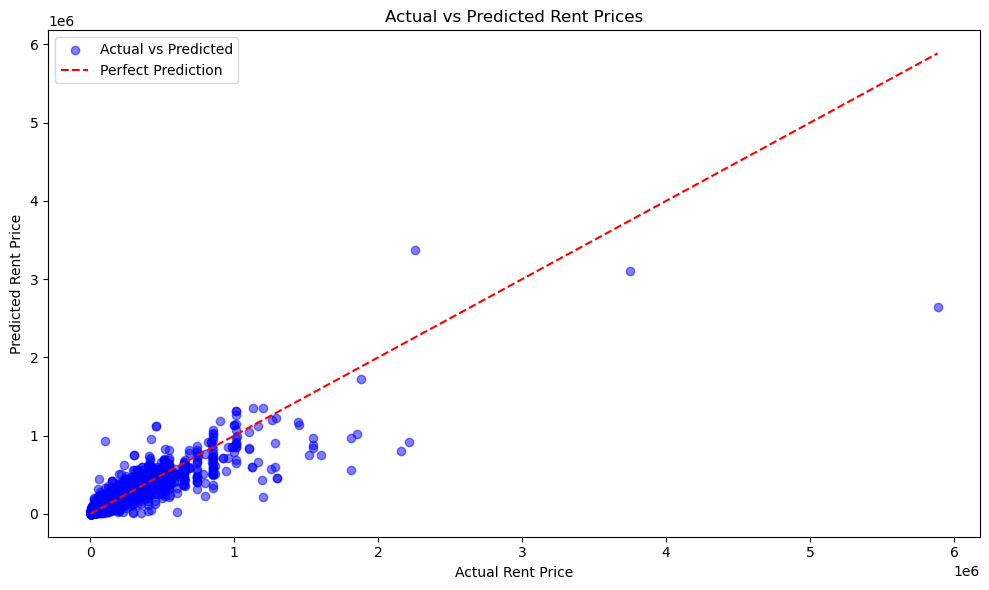

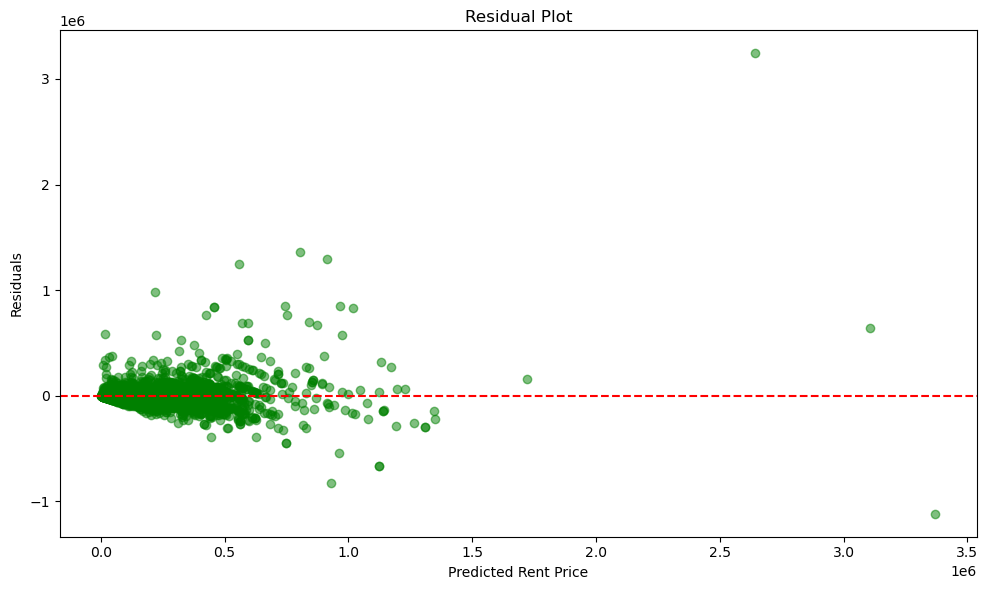

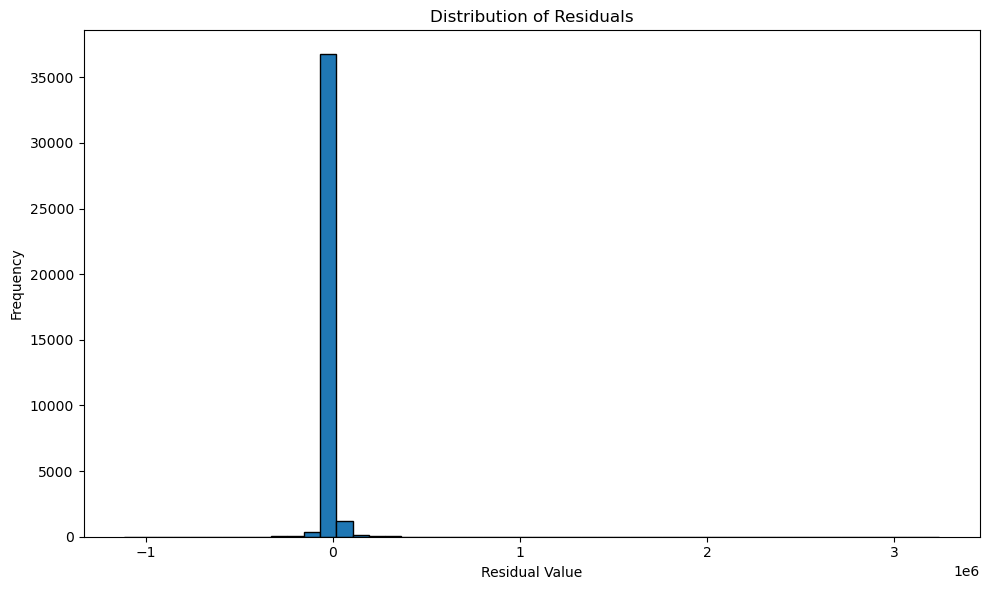

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

In [ ]:
# Create visualizations
# 1. Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Rent Price')
plt.ylabel('Predicted Rent Price')
plt.title('Actual vs Predicted Rent Prices (with Optimized Model)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, c='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rent Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# 3. Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

In [ ]:
# Function to make new predictions
def predict_house_rent(bedroom, layout_type, property_type, locality, area, furnish_type, bathroom, city):
    input_data = pd.DataFrame({
        'bedroom': [bedroom],
        'layout_type': [layout_type],
        'property_type': [property_type],
        'locality': [locality],
        'area': [area],
        'furnish_type': [furnish_type],
        'bathroom': [bathroom],
        'city': [city]
    })
    
    # Encode input data
    input_data['layout_type'] = le_layout.transform(input_data['layout_type'])
    input_data['property_type'] = le_property.transform(input_data['property_type'])
    input_data['locality'] = le_locality.transform(input_data['locality'])
    input_data['furnish_type'] = le_furnish.transform(input_data['furnish_type'])
    input_data['city'] = le_city.transform(input_data['city'])
    input_data['bedroom'] = le_bedroom.transform(input_data['bedroom'])
    input_data['bathroom'] = le_bathroom.transform(input_data['bathroom'])
    input_data['area'] = le_area.transform(input_data['area'])
    
    # Make prediction
    return best_model.predict(input_data)[0]

In [ ]:
import pickle
import os

In [ ]:
# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

In [ ]:
# Save the model and encoders
pickle.dump(best_model, open('model/model.pkl', 'wb'))
pickle.dump(le_layout, open('model/le_layout.pkl', 'wb'))
pickle.dump(le_property, open('model/le_property.pkl', 'wb'))
pickle.dump(le_locality, open('model/le_locality.pkl', 'wb'))
pickle.dump(le_furnish, open('model/le_furnish.pkl', 'wb'))
pickle.dump(le_city, open('model/le_city.pkl', 'wb'))
pickle.dump(le_bedroom, open('model/le_bedroom.pkl', 'wb'))
pickle.dump(le_bathroom, open('model/le_bathroom.pkl', 'wb'))